In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('pipeline_output_4.csv')
df.head()

,Unnamed: 0,Timestamp,Processing Time,Frame Difference Called,Face Detection Called,Face Recognition Called
0,0,0.111710,0.111709,1,0,0
1,1,0.163156,0.019971,1,0,0
2,2,0.211290,0.015842,1,0,0
3,3,0.261369,0.018279,1,0,0
4,4,0.312847,0.019445,1,0,0


In [29]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [30]:
df = df[1:]

In [31]:
df.head()

,Timestamp,Processing Time,Frame Difference Called,Face Detection Called,Face Recognition Called
1,0.163156,0.019971,1,0,0
2,0.211290,0.015842,1,0,0
3,0.261369,0.018279,1,0,0
4,0.312847,0.019445,1,0,0
5,0.364227,0.017091,1,0,0


In [32]:
newcol = []
for i in range(len(df)):
    frame_dif = df.iloc[i]["Frame Difference Called"]
    detection = df.iloc[i]["Face Detection Called"]
    recognition = df.iloc[i]["Face Recognition Called"]
    
    if(frame_dif and detection and not recognition):
        newcol.append("Frame Difference and Detection")

    if(frame_dif and detection and recognition):
        newcol.append("Frame Difference and Detection and Recognition")
    if(frame_dif and not detection and not recognition):
        newcol.append("Only Frame Difference")
df['Model Combination'] = newcol

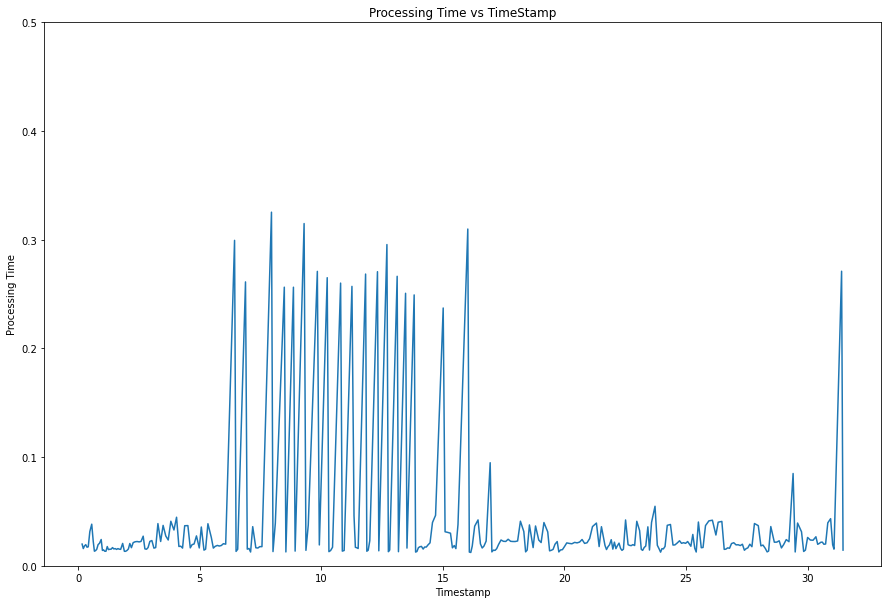

In [33]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=df, x="Timestamp", y="Processing Time")
ax.set_ylim(0,0.5)
plt.title("Processing Time vs TimeStamp")
plt.show()


In [34]:
df.head()

,Timestamp,Processing Time,Frame Difference Called,Face Detection Called,Face Recognition Called,Model Combination
1,0.163156,0.019971,1,0,0,Only Frame Difference
2,0.211290,0.015842,1,0,0,Only Frame Difference
3,0.261369,0.018279,1,0,0,Only Frame Difference
4,0.312847,0.019445,1,0,0,Only Frame Difference
5,0.364227,0.017091,1,0,0,Only Frame Difference


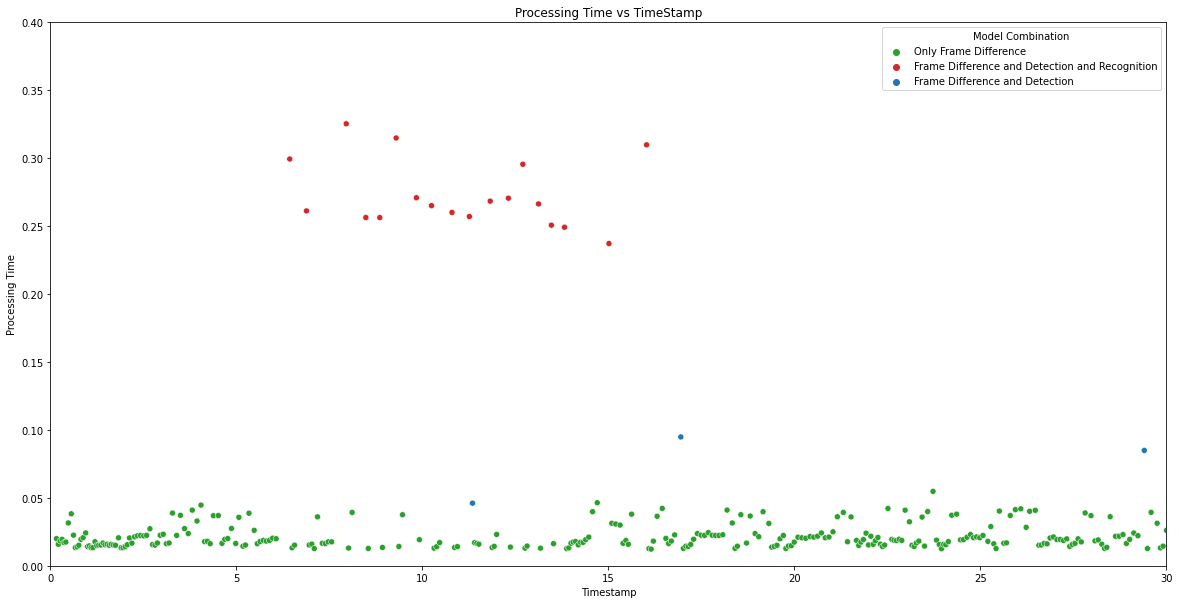

In [36]:
fig, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(data = df,x = "Timestamp",y = "Processing Time",hue = "Model Combination",palette=['tab:green', 'tab:red', 'tab:blue'] )
ax.set_ylim(0,0.4)
ax.set_xlim(0,30)
plt.title("Processing Time vs TimeStamp")
plt.show()

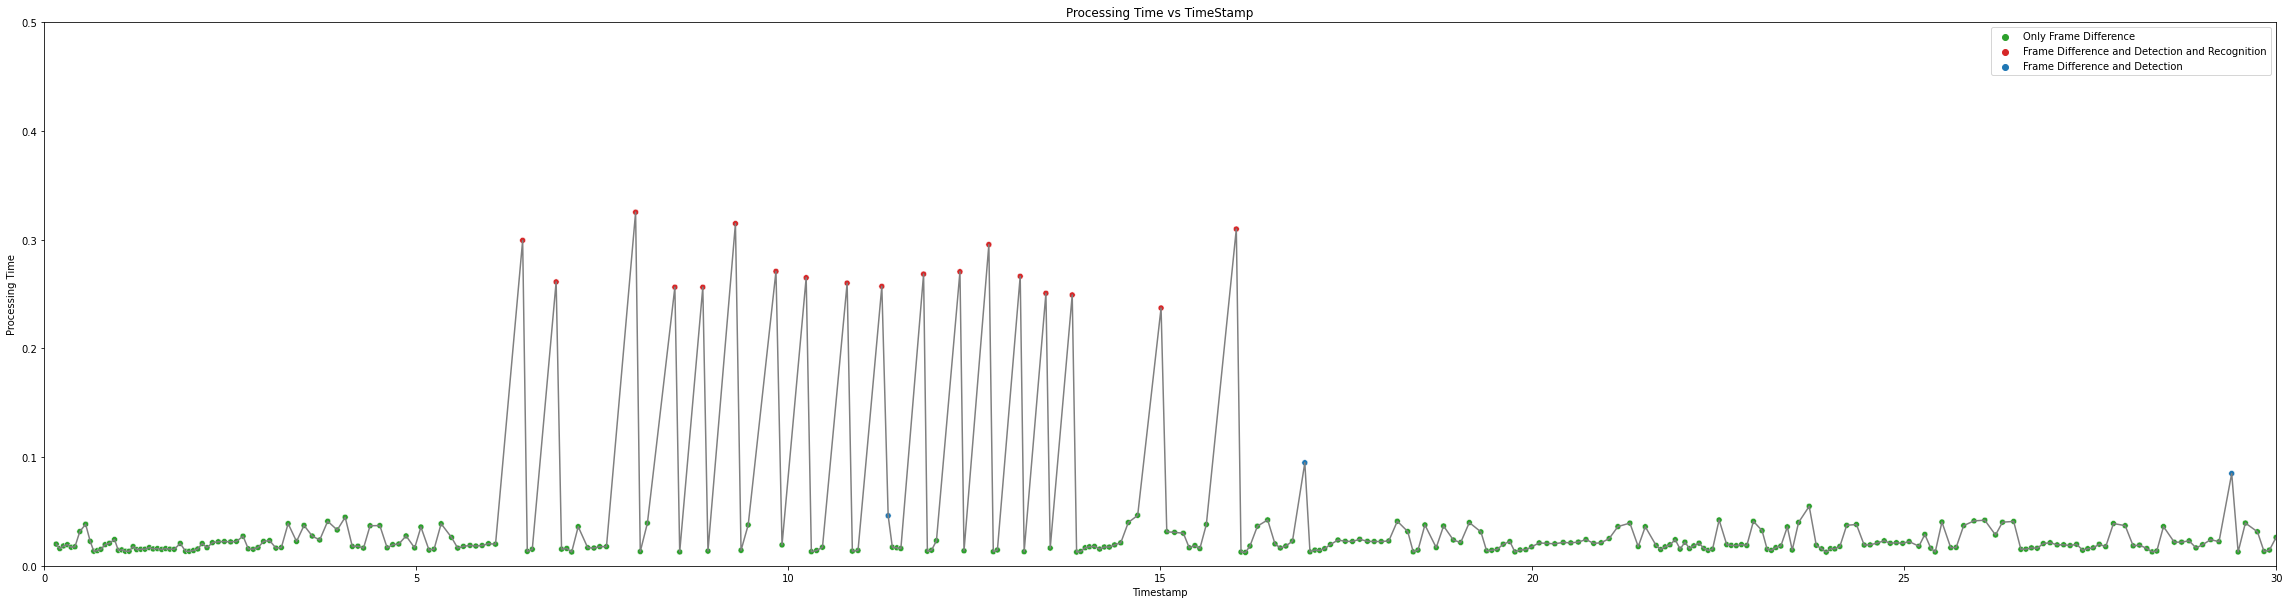

In [37]:
fig, ax = plt.subplots(figsize = (40,10))
sns.scatterplot(data = df,x = "Timestamp",y = "Processing Time",hue = "Model Combination",palette=['tab:green', 'tab:red', 'tab:blue'] )
sns.lineplot(data = df,x = "Timestamp",y = "Processing Time",color='grey')
ax.set_ylim(0,0.5)
ax.set_xlim(0,30)
plt.title("Processing Time vs TimeStamp")
plt.show()
fig2 = ax.get_figure()
fig2.savefig("processingtime_vs_timestamp.svg")

In [41]:
df['Model Combination'].value_counts()

Only Frame Difference                             296
Frame Difference and Detection and Recognition     19
Frame Difference and Detection                      3
Name: Model Combination, dtype: int64

Text(0.5, 0, 'Models Called')

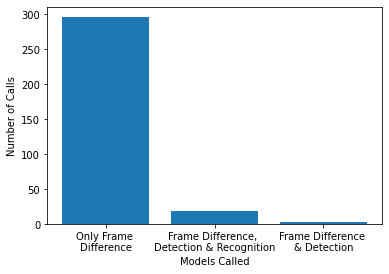

In [42]:
plt.bar(height = df['Model Combination'].value_counts(), x = ["Only Frame \nDifference","Frame Difference, \nDetection & Recognition","Frame Difference \n& Detection"])

plt.ylabel("Number of Calls")
plt.xlabel("Models Called")

Text(0.5, 0, 'Models Called')

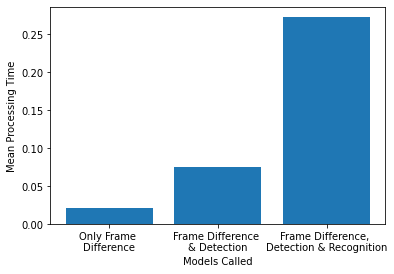

In [39]:
plt.bar(height = df.groupby(by = "Model Combination").mean()['Processing Time'].sort_values(), x = ["Only Frame \nDifference","Frame Difference \n& Detection","Frame Difference, \nDetection & Recognition"])
plt.xticks(rotation = 0)
plt.ylabel("Mean Processing Time")
plt.xlabel("Models Called")
#plt.legend(["Only Frame Difference","Frame Difference & Detection","Frame Difference, Detection & Recognition"])


In [43]:
df.groupby(by = "Model Combination").mean()['Processing Time'].sort_values()

Model Combination
Only Frame Difference                             0.021521
Frame Difference and Detection                    0.075269
Frame Difference and Detection and Recognition    0.272849
Name: Processing Time, dtype: float64

Text(0.5, 0, 'Models Called')

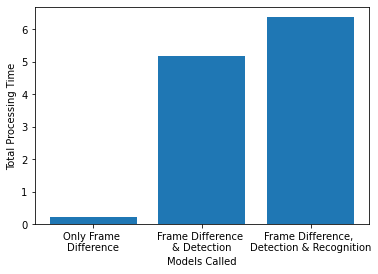

In [40]:
heights = df.groupby(by = "Model Combination").mean()['Processing Time'].sort_values()*df['Model Combination'].value_counts()
plt.bar(height = heights, x = ["Only Frame \nDifference","Frame Difference \n& Detection","Frame Difference, \nDetection & Recognition"])
plt.xticks(rotation = 0)
plt.ylabel("Total Processing Time")
plt.xlabel("Models Called")

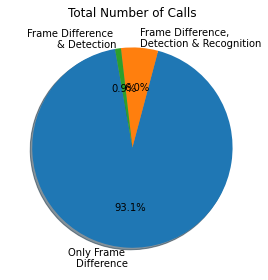

In [58]:
plt.pie(df['Model Combination'].value_counts(), labels=["Only Frame \nDifference","Frame Difference, \nDetection & Recognition","Frame Difference \n& Detection",],autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Total Number of Calls')
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


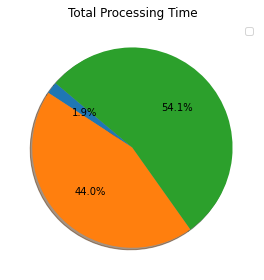

In [53]:
heights = df.groupby(by = "Model Combination").mean()['Processing Time'].sort_values()*df['Model Combination'].value_counts()
plt.pie(heights,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Processing Time')
plt.legend()
plt.tight_layout()